<a href="https://colab.research.google.com/github/vineetbiostats/AI4PH-thesis-project/blob/main/Copy_of_Project_INF_GRAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DESU IA4 HEALH

# **Project INF-GRAM**


The first project of INF-PROF was aimed at cleaning and exploring a dataset with pandas library. In this project you will have to build different models in order to classify the patients into two classes, _ckd_ or _notckd_. For this work you will have to use the sklearn library. The dataset is a cleaned version of the dataset of the INF-PROF project. You will have to do some description of the datasets, build some Machine Learning models and use the sklearn to tuned the parameters of these models and report the results with tables and graphics. 
 
The `classification` column is the one to predict with `ckd` if the patient was diagnosed with CKD and `notckd` if not. A full dictionary is presented below:


**Dictionary:**

* __id__: Identifiant of the patient __[Numerical]__
* __age__: Age in years __[Numerical]__
* __bp__: Blood Pressure in mm/Hg __[Numerical]__
* __sg__: Urine specific gravity __[one of (1.005, 1.010, 1.015, 1.020, 1.025)]__
* __al__: Albumin in urine. __[one of (0, 1, 2, 3, 4, 5)]__
* __su__: Sugar in urine. __[one of (0, 1, 2, 3, 4, 5)]__
* __rbc__: Red blood cells in urine. __[1 = "normal", 0 = "abnormal"]__
* __pc__: Pus cell in urine. __[1 = "normal", 0 = "abnormal"]__
* __pcc__: Pus cell clumps in urine. __[1 = "present", 0 = "notpresent"]__
* __ba__: Bacteria in urine. __[1 = "present", 0 ="notpresent"]__
* __bgr__: Blood glucose random in mgs/dl __[Numerical]__
* __bu__: Blood urea in mgs/dl __[Numerical]__
* __sc__: Serum creatinine in mgs/dl __[Numerical]__
* __sod__: Sodium in mEq/L __[Numerical]__
* __pot__: Potassium in mEq/L __[Numerical]__
* __hemo__: Hemoglobin in gms __[Numerical]__
* __pcv__: Packed cell volume (volume percentage) __[Numerical]__
* __wc__: White blood cell count in cells/cumm __[Numercial]__
* __rc__: Red blood cell count in millions/cmm __[Numerical]__
* __htn__: Hypertension. __[1 = "yes", 0 = "no"]__
* __dm__: Diabetes mellitus. __[1 = "yes", 0 = "no"]__
* __cad__: Coronary artery disease. __[1 = "yes", 0 = "no"]__
* __appet__: Appetite. __[1 = "good", 0 = "poor"]__
* __pe__: Pedal edema. __[1 = "yes", 0 = "no"]__
* __ane__: Anemia. __[1 = "yes", 0 = "no"]__
* __classification__: Chronic kidneys disease. __[one of ('ckd', 'notckd')]__.

The dataset is available here [https://raw.githubusercontent.com/NicolasNgo/Project1_INF_GRAM/main/ckd.csv](https://raw.githubusercontent.com/NicolasNgo/Project1_INF_GRAM/main/ckd.csv). 

## **Task 1: Importation of the dataset**

Import the dataset in a pandas' dataframe format. 

## **Task 2: Check the data**
Give a first glance at the first rows of the dataset and answer these questions:  
* How many patients are there ?
* How many features were collected ?
* Is there any missing values ? 
* What is the proportion of patients diagnosed with CKD ?

In [ ]:
import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt 
import seaborn as sns
SEED = 100

In [ ]:
#Task 1: Importation of the dataset
#from google.colab import drive
#drive.mount('/content/drive/',force_remount=True)
#df = pd.read_csv('ckd.csv')

df = pd.read_csv("https://raw.githubusercontent.com/NicolasNgo/Project1_INF_GRAM/main/ckd.csv", sep=",",error_bad_lines=False)
df.head()

,Unnamed: 0,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,1,1,0,1,0,0,ckd
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8,0,0,0,1,0,0,ckd
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,0,1,0,0,0,1,ckd
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,0,1,1,ckd
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,0,0,0,1,0,0,ckd


In [ ]:
#Task 2: Check the data
print ('Rowa     : ', df.shape[0])
print ('Columns  : ', df.shape[1])
print ('\nFeatures : \n', df.columns.tolist())
print ('\nMissing values:  ', df.isnull().sum().values.sum())
print ('\nUnique values :  \n', df.nunique())

Rowa     :  397
Columns  :  26

Features : 
 ['Unnamed: 0', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

Missing values:   0

Unique values :  
 Unnamed: 0        397
age                77
bp                 10
sg                  5
al                  6
su                  6
rbc                 2
pc                  2
pcc                 2
ba                  2
bgr               144
bu                116
sc                 83
sod                32
pot                38
hemo              115
pcv                42
wc                 90
rc                 45
htn                 2
dm                  2
cad                 2
appet               2
pe                  2
ane                 2
classification      2
dtype: int64


In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      397 non-null    int64  
 1   age             397 non-null    float64
 2   bp              397 non-null    float64
 3   sg              397 non-null    float64
 4   al              397 non-null    float64
 5   su              397 non-null    float64
 6   rbc             397 non-null    int64  
 7   pc              397 non-null    int64  
 8   pcc             397 non-null    int64  
 9   ba              397 non-null    int64  
 10  bgr             397 non-null    float64
 11  bu              397 non-null    float64
 12  sc              397 non-null    float64
 13  sod             397 non-null    float64
 14  pot             397 non-null    float64
 15  hemo            397 non-null    float64
 16  pcv             397 non-null    float64
 17  wc              397 non-null    flo

Unnamed: 0        0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

## **Task 3: Preprocessing**
A preprocessing step gave us the important features for the classification of CKD. The features are the age, the urine specific gravity (sg), the albumin in urine (al), the blood urea (bu), the serum creatinine (sc), the hemoglobin (hemo) and the packed cell volume (pcv). Create a new dataframe with only these features and the target feature, _classification_.  For the rest of the project we will be working with this dataset. 

Give some descriptive statistics of the new dataframe. 

In [ ]:
df1 = pd.DataFrame(df, columns = ['age', 'sg', 'al', 'bu', 'sc', 'hemo', 'pcv', 'classification'])
df1.head()

,age,sg,al,bu,sc,hemo,pcv,classification
0,48.0,1.020,1.0,36.0,1.2,15.4,44.0,ckd
1,7.0,1.020,4.0,18.0,0.8,11.3,38.0,ckd
2,62.0,1.010,2.0,53.0,1.8,9.6,31.0,ckd
3,48.0,1.005,4.0,56.0,3.8,11.2,32.0,ckd
4,51.0,1.010,2.0,26.0,1.4,11.6,35.0,ckd


In [ ]:
classification_code = {"classification": {"notckd":0, "ckd":1}}
df1 = df1.replace(classification_code)
df1.head()

,age,sg,al,bu,sc,hemo,pcv,classification
0,48.0,1.020,1.0,36.0,1.2,15.4,44.0,1
1,7.0,1.020,4.0,18.0,0.8,11.3,38.0,1
2,62.0,1.010,2.0,53.0,1.8,9.6,31.0,1
3,48.0,1.005,4.0,56.0,3.8,11.2,32.0,1
4,51.0,1.010,2.0,26.0,1.4,11.6,35.0,1


In [ ]:
df1.describe()

,age,sg,al,bu,sc,hemo,pcv,classification
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,51.489924,1.017733,0.894207,55.241058,2.731486,12.563980,39.138539,0.622166
std,17.021967,0.005438,1.308053,45.893209,4.032573,2.716576,8.145052,0.485458
min,2.000000,1.005000,0.000000,1.500000,0.400000,3.100000,9.000000,0.000000
25%,42.000000,1.015000,0.000000,27.000000,0.900000,10.900000,34.000000,0.000000
50%,54.500000,1.020000,0.000000,41.500000,1.250000,12.700000,40.000000,1.000000
75%,64.000000,1.020000,2.000000,60.000000,2.700000,14.700000,44.000000,1.000000
max,90.000000,1.025000,5.000000,322.000000,48.100000,17.800000,54.000000,1.000000


## **Task 4: Visualization**

For each feature, plot an histogram of the values in each class (_ckd_ and _notckd_) as well as the scatter plots of the varibales by pairs.

1    0.622166
0    0.377834
Name: classification, dtype: float64


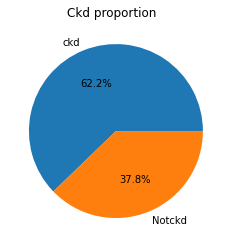

In [ ]:
#procedure for pie chart
proportion = df1['classification'].value_counts() / df1.classification.count()
print (proportion)
label = ['ckd', 'Notckd']

plt.pie(proportion,labels = label,autopct='%1.1f%%')

plt.title('Ckd proportion  ')
plt.show()

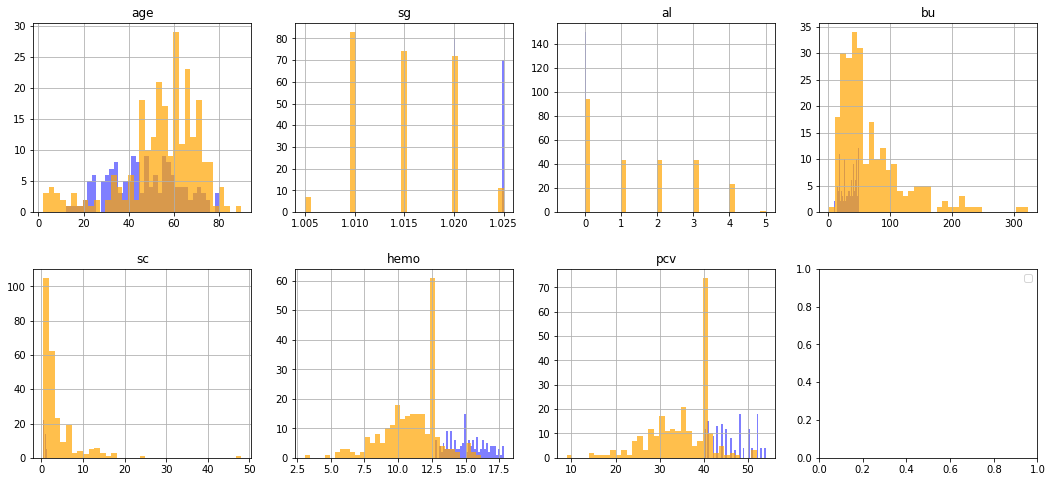

In [ ]:
#histogram
features = ['age', 'sg', 'al', 'bu', 'sc', 'hemo', 'pcv']

ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,8) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    
    df1[df1.classification==0][feature].hist(bins=35, color='blue', alpha=0.5, ax=ax[row, col]).set_title(feature)
    df1[df1.classification==1][feature].hist(bins=35, color='orange', alpha=0.7, ax=ax[row, col])
    
plt.legend(['notckd', 'ckd'])
fig.subplots_adjust(hspace=0.3)

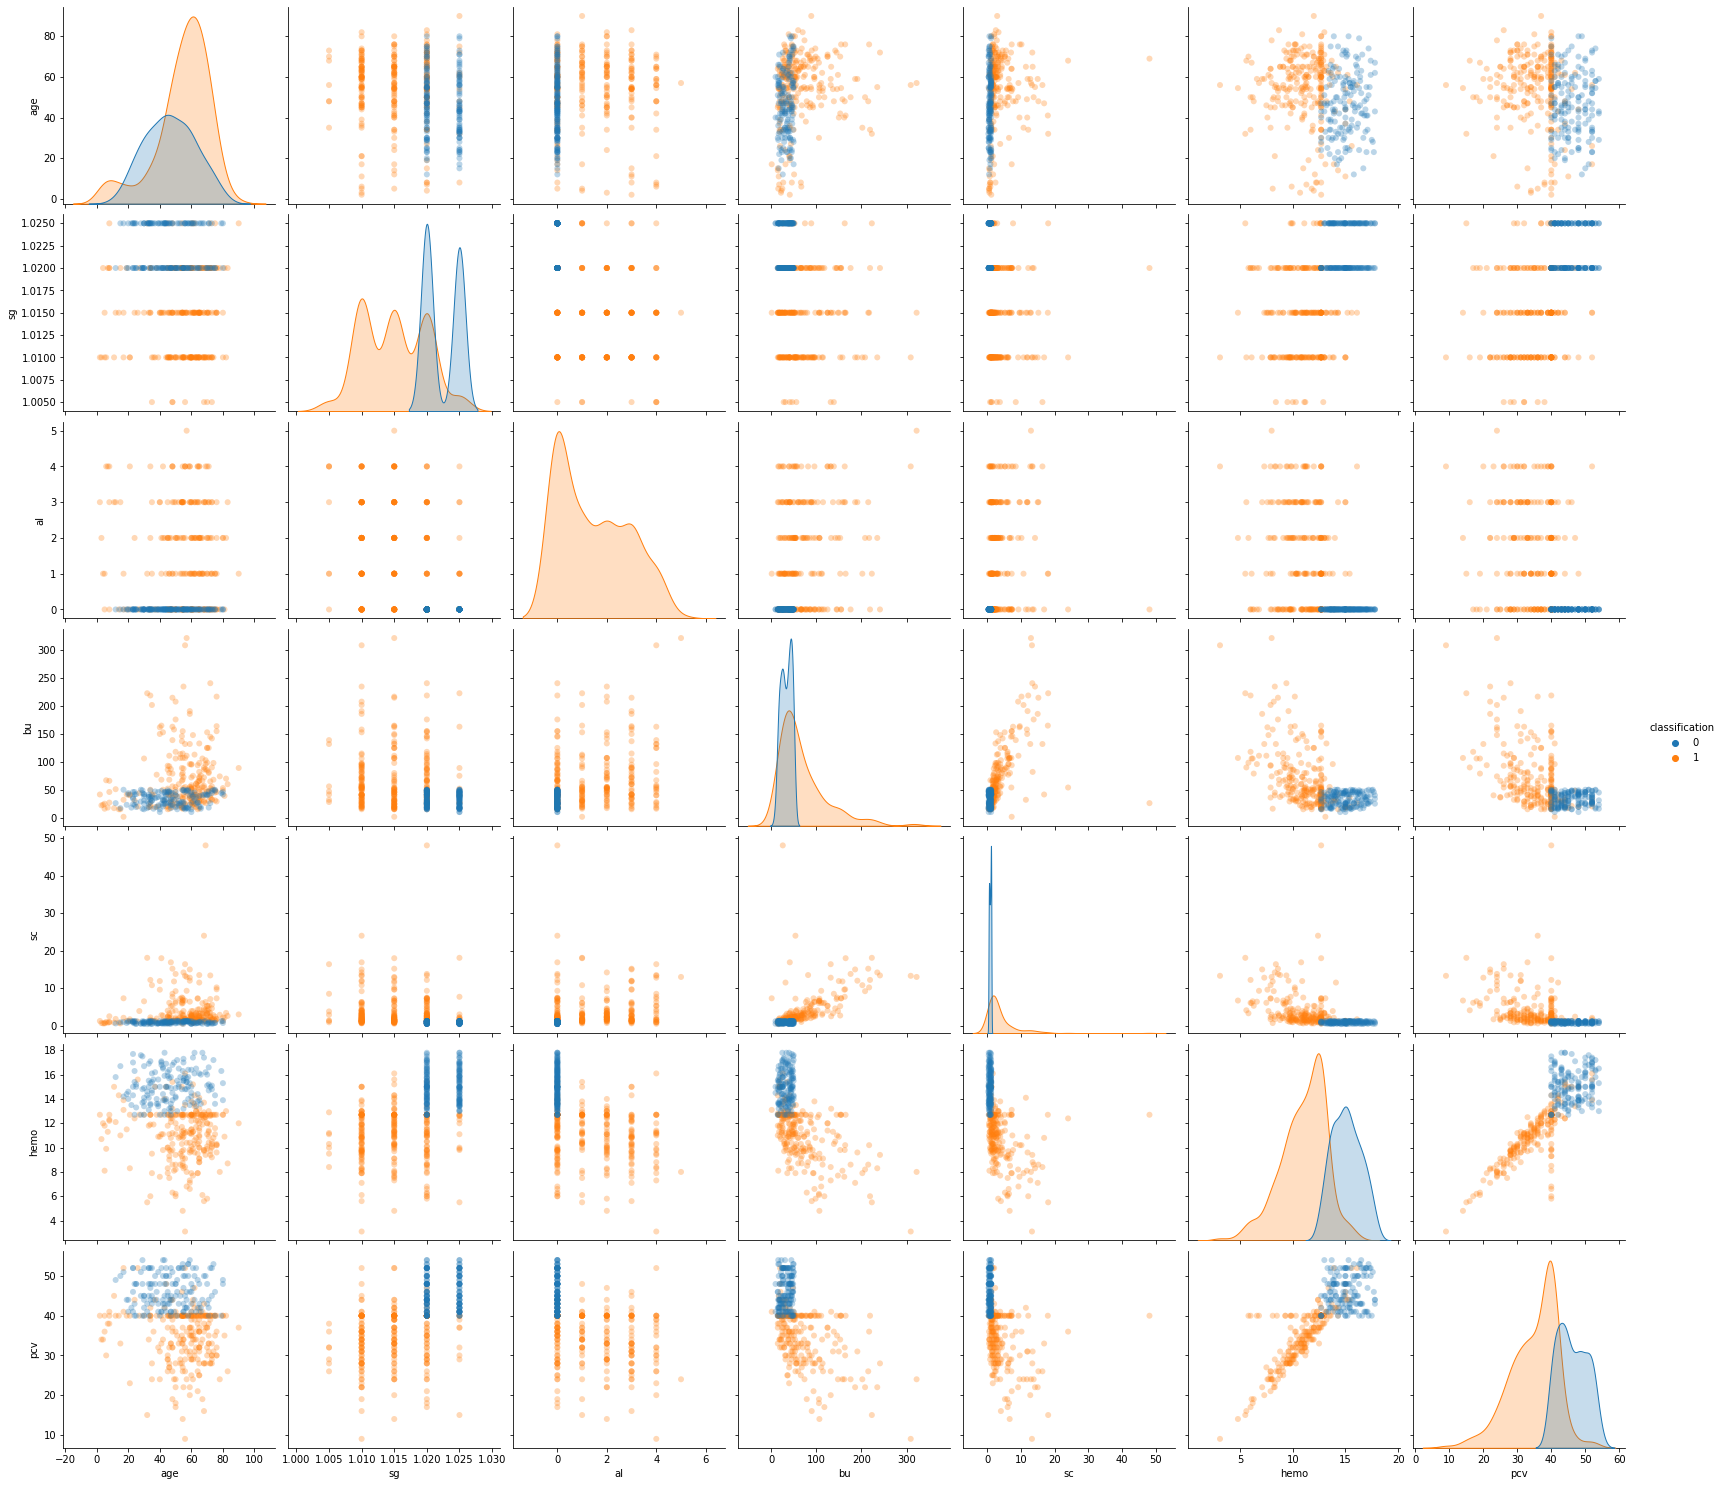

In [ ]:
# the scatter plots of the varibales by pairs
sns.pairplot(df1, hue='classification', plot_kws=dict(alpha=.3, edgecolor='none'), height=3, aspect=1.1)

## **Task 5: Correlation matrix**

Compute the correlation matrix of the features, give a graphic representing this correlation matrix and make some comments about the correlation in the dataset. 

The correlation matrix should include the correlation with the _classification_ feature. For this task you'll have to transform the values of _classification_ to binary values. I recommend that you use 1 for _ckd_ and 0 for _notckd_. 

In [ ]:
correlation_matrix = df1.corr()
print(correlation_matrix)

                     age        sg  ...       pcv  classification
age             1.000000 -0.158140  ... -0.213001        0.225524
sg             -0.158140  1.000000  ...  0.499715       -0.660099
al              0.086998 -0.481130  ... -0.469580        0.533405
bu              0.189843 -0.239013  ... -0.552620        0.375646
sc              0.148687 -0.233993  ... -0.435947        0.357925
hemo           -0.177933  0.492252  ...  0.846445       -0.725154
pcv            -0.213001  0.499715  ...  1.000000       -0.673272
classification  0.225524 -0.660099  ... -0.673272        1.000000

[8 rows x 8 columns]


(8.5, -0.5)

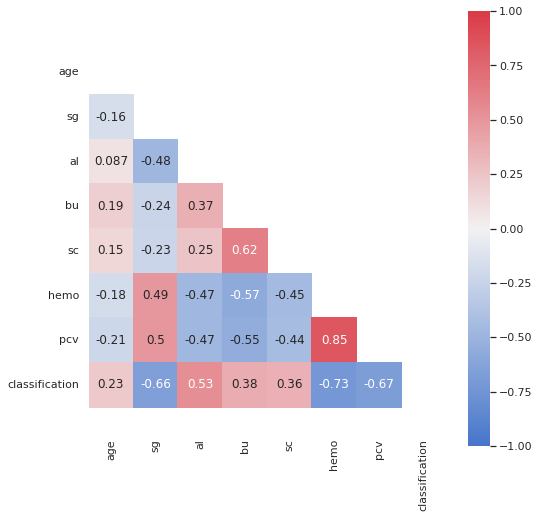

In [ ]:
#Visualisation of corrélation matrix (Heatmap)
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(df1.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(8,8))
# Create a custom color palette
cmap = sns.diverging_palette(255, 10, as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Red=10, Green=128, Blue=255
# Plot the heatmap
sns.heatmap(correlation_matrix, mask=mask, annot=True, square=True, cmap=cmap , vmin=-1, vmax=1, ax=ax)  # annot display corr label
# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)


From above correlation matrix, a very high positive correlation (r=0.85) was observed between the hemoglobin (hemo) and the packed cell volume (pcv).The blood urea (bu) and the serum creatinine (sc) were alos found to be higly correlated with each other (r=0.62). The blood urea were found to be higly negatively correlated with the hemoglobin level and the packed cell volume level.

## **Task 6: Splitting the data**

Split the dataset into two dataset, one for the training and one for the validation of your models. Use 70% of the data for the training dataset and 30% of the data for the validation dataset. 

Give the number of patients and CKD in both dataset. 

In [ ]:
#Split the data set into input features, X, and targe feature, y
X, y = df1.drop('classification', axis=1), df1['classification']
print(X.shape, y.shape)

# type(X)   # pandas.core.frame.DataFrame
# type(y)   # pandas.core.series.Series

(397, 7) (397,)


In [ ]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X.values)
X_scaled = std.transform(X.values)
print('X_scaled', X_scaled.shape)


X_scaled (397, 7)


In [ ]:
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X_man_mix = scaler.transform(X)
print('X_man_mix', X_man_mix.shape)


X_man_mix (397, 7)


In [ ]:
 #split data to 70:30 ratio for train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.3, random_state=SEED, stratify=y)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (277, 7)
y_train (277,)
X_test (120, 7)
y_test (120,)


1    0.620939
0    0.379061
Name: classification, dtype: float64


([<matplotlib.patches.Wedge at 0x7f6cf1ba3e50>,
 [Text(-0.4079510342536604, 1.0215556537219932, 'ckd'),
  Text(0.40795093860871534, -1.0215556919171211, 'notckd')],
 [Text(-0.22251874595654203, 0.5572121747574508, '62.1%'),
  Text(0.222518693786572, -0.557212195591157, '37.9%')])

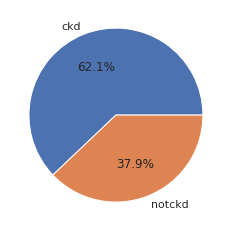

In [ ]:
#Check the proportion of diabetiques patients in both training and test dataset, check this proposrion again without indicating stratify = y
#training dataset
y_train.head ()
y_train.describe()

proportion = y_train.value_counts() / y_train.count()
print (proportion)

label = ['ckd', 'notckd']

plt.pie(proportion,labels = label,autopct='%1.1f%%')

1    0.625
0    0.375
Name: classification, dtype: float64


([<matplotlib.patches.Wedge at 0x7f6ce1822b50>,
 [Text(-0.42095177560159874, 1.0162674857624154, 'ckd'),
  Text(0.420951775601599, -1.0162674857624154, 'notckd')],
 [Text(-0.22961005941905382, 0.5543277195067721, '62.5%'),
  Text(0.229610059419054, -0.554327719506772, '37.5%')])

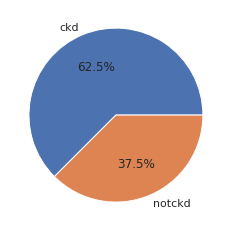

In [ ]:
#test data
y_test.head ()
y_test.describe()

proportion = y_test.value_counts() / y_test.count()
print (proportion)

label = ['ckd', 'notckd']

plt.pie(proportion,labels = label,autopct='%1.1f%%')

## **Task 7: Models building and evaluation**
We want to build the best model, in terms of F1-score, for this task you will have to test multiple machine learning models, tune the hyperparameters using gridsearch, test your models on the validation dataset, print the ROC curve and the confusion matrix for each model and report the results with a table.

You'll have to test 3 models:
* The Support Vector Machine
* The random forest algorithm.
* Adaboost classifier


### **SVM**

In [ ]:
from sklearn import svm
clf = svm.SVC() # We declare the estimator with its hyperparameters
clf.fit(X_train, y_train) #We call the estimator to learn the parameters from the training dataset
y_pred = clf.predict(X_test)

In [ ]:
clf.kernel #hyperparameters
clf.support_ #learned parameters

array([  3,   5,  10,  30,  32,  38,  67,  77,  80,  86,  93, 103, 105,
       107, 152, 159, 174, 189, 196, 197, 208, 213, 226, 276,  21,  29,
        34,  63,  85,  89,  92,  97,  99, 104, 108, 113, 124, 137, 144,
       153, 165, 168, 170, 181, 205, 209, 219, 224, 233, 237, 242, 249,
       260, 273], dtype=int32)

In [ ]:
y_test

277    0
271    0
255    0
93     1
144    1
      ..
53     1
340    0
251    0
57     1
99     1
Name: classification, Length: 120, dtype: int64

[[101   4]
 [  3 169]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


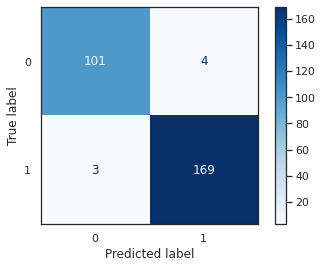

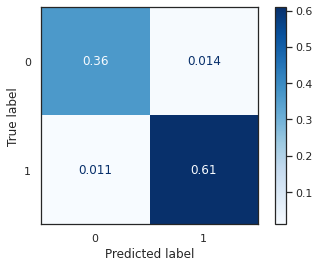

In [ ]:
#Model evaluation
# in training data

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


y_pred = clf.predict(X_train)

cf_matrix = confusion_matrix(y_train, y_pred)

print(cf_matrix)

plot_confusion_matrix(clf, X_train, y_train, cmap='Blues')  

plot_confusion_matrix(clf, X_train, y_train, cmap='Blues', normalize = 'all')  

[[45  0]
 [ 1 74]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


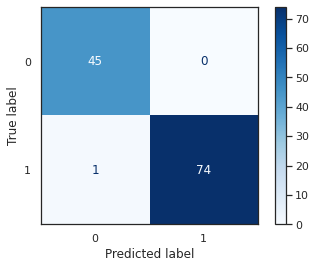

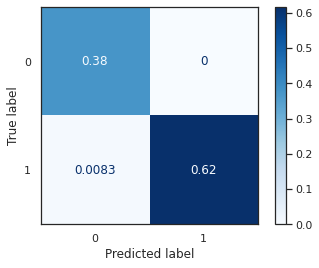

In [ ]:
# in test data

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


y_pred = clf.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

plot_confusion_matrix(clf, X_test, y_test, cmap='Blues')  

plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', normalize = 'all')  

In [ ]:
#Quality measures
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)



0.9916666666666667

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.9916844900066377

In [ ]:
 from sklearn.metrics import precision_score
 precision_score(y_test, y_pred, average='weighted')

0.9918478260869565

[0. 0. 1.]
[0.         0.98666667 1.        ]
[2 1 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


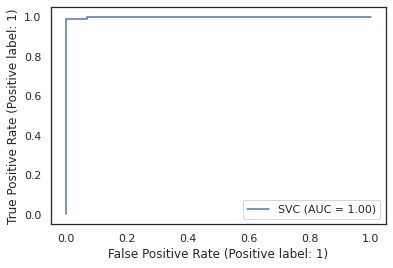

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print(fpr)
print(tpr)
print(thresholds)
metrics.plot_roc_curve(clf, X_test, y_test)  
plt.show()          

In [ ]:
auc_scoreauc_score = metrics.roc_auc_score(y_test, y_pred, average='weighted')
print(auc_scoreauc_score)

0.9422222222222222


In [ ]:
#Improving the model : Tunning the hyper-parameters
clf_poly = svm.SVC(kernel = 'poly', C = 1, degree = 3, class_weight = 'balanced') # We declare the estimator with its hyperparameters
clf_poly.fit(X_train, y_train) #We call the estimator to learn the parameters from the training dataset
y_pred = clf_poly.predict(X_test)
auc_score = metrics.roc_auc_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

In [ ]:
auc_score

0.9422222222222222

In [ ]:
f1_score

0.9497607655502392

In [ ]:
#choosing the best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import svm


gamma_vector = np.linspace(1e-4,1e-2,num=10)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': gamma_vector, 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['poly'], 'C': [1, 10, 100, 1000], 'degree' : [2,3,4,5]}]

scores = ['recall', 'f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        svm.SVC(class_weight= 'balanced'), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'C': 10, 'gamma': 0.0067, 'kernel': 'rbf'}

Grid scores on development set:

0.500 (+/-0.000) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.884 (+/-0.100) for {'C': 1, 'gamma': 0.0012000000000000001, 'kernel': 'rbf'}
0.910 (+/-0.080) for {'C': 1, 'gamma': 0.0023, 'kernel': 'rbf'}
0.922 (+/-0.067) for {'C': 1, 'gamma': 0.0034, 'kernel': 'rbf'}
0.930 (+/-0.046) for {'C': 1, 'gamma': 0.0045000000000000005, 'kernel': 'rbf'}
0.933 (+/-0.039) for {'C': 1, 'gamma': 0.005600000000000001, 'kernel': 'rbf'}
0.936 (+/-0.035) for {'C': 1, 'gamma': 0.0067, 'kernel': 'rbf'}
0.945 (+/-0.038) for {'C': 1, 'gamma': 0.0078000000000000005, 'kernel': 'rbf'}
0.948 (+/-0.043) for {'C': 1, 'gamma': 0.0089, 'kernel': 'rbf'}
0.956 (+/-0.048) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.881 (+/-0.106) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.962 (+/-0.051) for {'C': 10, 'gamma': 0.0012000000000000001, 'kernel': 'r

### **Random forest model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=10, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)
print(rnd_clf, accuracy_score(y_test, y_pred))

RandomForestClassifier(max_leaf_nodes=16, n_estimators=10, n_jobs=-1) 0.9833333333333333


[[45  0]
 [ 0 75]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


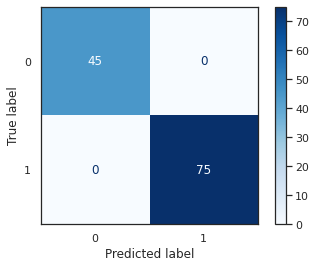

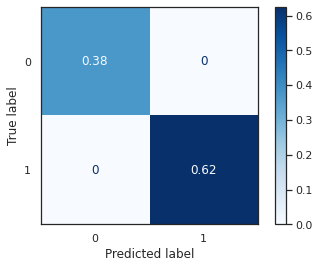

In [ ]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


y_pred = rnd_clf.predict(X_test)

rnd_cf_matrix = confusion_matrix(y_test, y_pred)

print(rnd_cf_matrix)

plot_confusion_matrix(rnd_clf, X_test, y_test, cmap='Blues')  

plot_confusion_matrix(rnd_clf, X_test, y_test, cmap='Blues', normalize = 'all')  

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

1.0

In [ ]:
 from sklearn.metrics import precision_score
 precision_score(y_test, y_pred, average='weighted')

1.0

[0. 0. 1.]
[0. 1. 1.]
[2 1 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


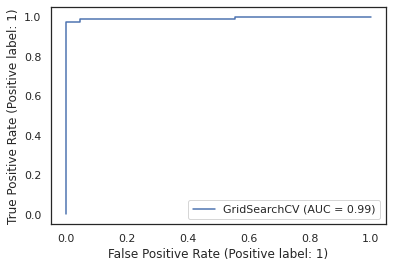

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print(fpr)
print(tpr)
print(thresholds)
metrics.plot_roc_curve(clf, X_test, y_test)  
plt.show()    

In [ ]:
auc_scoreauc_score = metrics.roc_auc_score(y_test, y_pred, average='weighted')
print(auc_scoreauc_score)

1.0


In [ ]:
forest_importances = pd.Series(rnd_clf.feature_importances_,index=["age", "sg", "al", "bu", "sc", "hemo", "pcv"])
forest_importances.sort_values(ascending=False,inplace=True)
forest_importances

hemo    0.319087
sc      0.222510
sg      0.215746
pcv     0.126228
al      0.083043
age     0.020822
bu      0.012564
dtype: float64

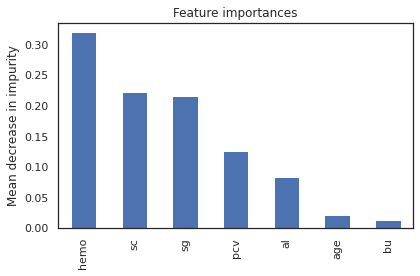

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### **Ada boost classifier**

In [ ]:
#bagging
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
        DecisionTreeClassifier(), n_estimators=500,
        max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
DecisionTreeClassifier(max_depth=3), n_estimators=200,
algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
print(ada_clf, accuracy_score(y_test, y_pred))

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.5, n_estimators=200, random_state=0) 0.9916666666666667


[[45  0]
 [ 1 74]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


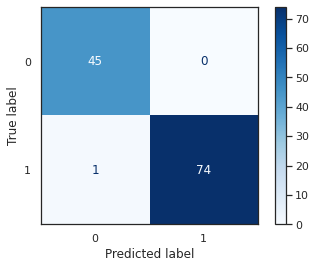

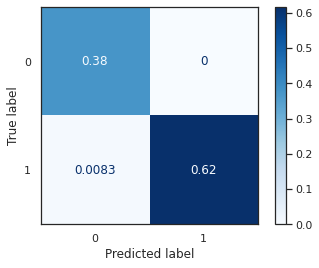

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


y_pred = ada_clf.predict(X_test)

ada_cf_matrix = confusion_matrix(y_test, y_pred)

print(ada_cf_matrix)

plot_confusion_matrix(ada_clf, X_test, y_test, cmap='Blues')  

plot_confusion_matrix(ada_clf, X_test, y_test, cmap='Blues', normalize = 'all')

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.9916844900066377

In [ ]:
 from sklearn.metrics import precision_score
 precision_score(y_test, y_pred, average='weighted')

0.9918478260869565

[0. 0. 1.]
[0.         0.98666667 1.        ]
[2 1 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


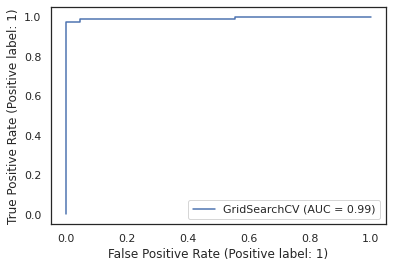

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print(fpr)
print(tpr)
print(thresholds)
metrics.plot_roc_curve(clf, X_test, y_test)  
plt.show()  

In [ ]:
auc_scoreauc_score = metrics.roc_auc_score(y_test, y_pred, average='weighted')
print(auc_scoreauc_score)

0.9933333333333334


In [ ]:
ada_importances = pd.Series(ada_clf.feature_importances_,index=["age", "sg", "al", "bu", "sc", "hemo", "pcv"])
ada_importances.sort_values(ascending=False,inplace=True)
ada_importances

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:631: RuntimeWarning: invalid value encountered in true_divide
  return self.tree_.compute_feature_importances()


al      0.093230
hemo    0.090440
sg      0.085909
pcv     0.029916
bu      0.010056
age     0.005465
sc           NaN
dtype: float64

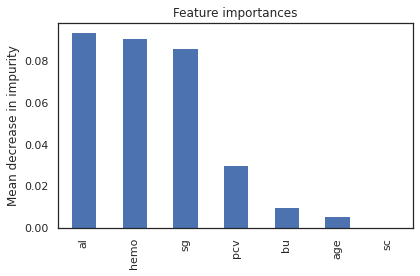

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ada_importances.plot.bar()
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()